In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [2]:
train = pd.read_csv('Train.csv')
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [3]:
train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [4]:
train['X_12'].fillna(method = 'ffill',inplace=True)

In [5]:
test = pd.read_csv('Test.csv')
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [6]:
test.tail()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
15898,CR_44468,28-NOV-97,1,22,22,7,3,15,10,0,5,1,174,0.0,72,29,43
15899,CR_158460,09-JUN-12,0,35,30,3,5,1,0,2,3,2,0,2.0,72,93,34
15900,CR_115946,22-APR-06,0,26,27,9,0,6,4,2,6,1,0,1.0,72,62,34
15901,CR_137663,03-APR-09,0,21,23,4,1,2,7,1,6,2,249,2.0,92,62,34
15902,CR_33545,24-APR-96,0,4,4,6,5,4,2,5,6,1,249,1.0,72,29,34


In [7]:
test.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [8]:
test['X_12'].fillna(method = 'bfill',inplace=True)

In [9]:
test.set_index('INCIDENT_ID', inplace=True)

In [10]:
sub = pd.read_csv('sample_submission.csv')
sub.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,0
2,.,.
3,.,.
4,CR_196089,1


In [11]:
sub.shape

(7, 2)

(array([ 1068.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 22788.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

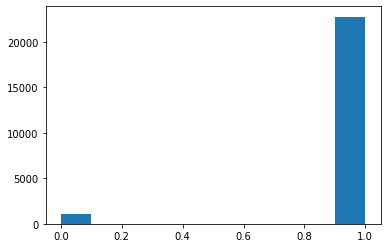

In [12]:
plt.hist(train.MULTIPLE_OFFENSE)

In [13]:
train.MULTIPLE_OFFENSE.value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [14]:
train.shape

(23856, 18)

In [15]:
corr = train.corr()
corr

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
X_1,1.000000,0.021999,0.022603,0.002137,-0.034220,0.409876,0.421454,-0.061897,0.017984,0.004155,-0.003078,-0.033035,0.111611,-0.012708,-0.012132,0.014034
X_2,0.021999,1.000000,0.996985,-0.104321,-0.349190,0.119718,0.058806,-0.038174,-0.017749,-0.016710,0.038003,-0.067241,0.046668,0.015194,0.013822,-0.027293
X_3,0.022603,0.996985,1.000000,-0.075344,-0.347519,0.124662,0.072954,-0.033035,-0.019853,-0.014485,0.036946,-0.064382,0.043201,0.013522,0.006851,-0.027218
X_4,0.002137,-0.104321,-0.075344,1.000000,0.439616,0.028929,0.094076,0.075197,-0.008453,0.038077,-0.037614,0.058821,-0.051861,-0.030024,-0.033198,-0.002921
X_5,-0.034220,-0.349190,-0.347519,0.439616,1.000000,-0.062784,0.010161,0.046926,0.046428,0.046212,-0.043111,0.081404,-0.071233,-0.003413,-0.036383,-0.003450
X_6,0.409876,0.119718,0.124662,0.028929,-0.062784,1.000000,0.695243,-0.063541,0.079192,0.021186,-0.002990,-0.030526,0.047845,-0.013155,-0.006621,-0.007903
X_7,0.421454,0.058806,0.072954,0.094076,0.010161,0.695243,1.000000,-0.011824,0.011519,0.023205,0.002970,-0.000002,0.012204,0.003738,-0.003277,-0.008036
X_8,-0.061897,-0.038174,-0.033035,0.075197,0.046926,-0.063541,-0.011824,1.000000,-0.090184,0.222004,0.009424,0.272171,-0.048140,0.003987,0.017636,-0.033397
X_9,0.017984,-0.017749,-0.019853,-0.008453,0.046428,0.079192,0.011519,-0.090184,1.000000,0.013388,-0.006152,0.005066,0.023537,-0.297295,0.006475,-0.000748
X_10,0.004155,-0.016710,-0.014485,0.038077,0.046212,0.021186,0.023205,0.222004,0.013388,1.000000,-0.045596,0.875633,0.002332,-0.016519,-0.003336,-0.242596


In [16]:
train.set_index('INCIDENT_ID', inplace=True)

In [17]:
train.head()

,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
INCIDENT_ID,,,,,,,,,,,,,,,,,
CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [18]:
X = train.drop(['DATE', 'MULTIPLE_OFFENSE'], axis=1)
Y = train.MULTIPLE_OFFENSE
Z = test.drop('DATE', axis=1)

# Fitting a model with imbalance class size parameter of XGBoost and SVM

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
Z_scaled = scaler.fit_transform(Z)

In [21]:
model = XGBClassifier(scale_pos_weight=21) #this parameter penalizes the misclassification of minority class more than majority 
model.fit(X_train_scaled, Y_train)
score = model.score(X_test_scaled, Y_test)
print(score)

0.9893126571668064


In [22]:
pred = model.predict(Z_scaled)

In [23]:
test.reset_index(inplace=True)

In [24]:
submission = pd.DataFrame({'INCIDENT_ID':test['INCIDENT_ID'],'MULTIPLE_OFFENSE':pred.ravel()})
submission.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [25]:
submission.to_csv(r'submission15.csv', index = False, header=True)

In [26]:
# Train model with Linear kernel
clf = SVC(kernel='linear', 
            class_weight='balanced', #penalize
            probability=True)
 
clf.fit(X_train_scaled, Y_train)
score = clf.score(X_test_scaled, Y_test)
print(score)

0.7340737636211232


In [27]:
pred1 = clf.predict(Z_scaled)

In [28]:
submission1 = pd.DataFrame({'INCIDENT_ID':test['INCIDENT_ID'],'MULTIPLE_OFFENSE':pred1.ravel()})

In [29]:
submission1.to_csv(r'submission16.csv', index = False, header=True)

In [30]:
# Training model with Sigmoid Kernel
clf1 = SVC(kernel='sigmoid', 
            class_weight='balanced', # penalize
            probability=True)
 
clf1.fit(X_train_scaled, Y_train)
score = clf1.score(X_test_scaled, Y_test)
print(score)

0.48700754400670576


# Performing Random Over-Sampling of Minority Class

In [31]:
ros = RandomOverSampler()
X_ros, Y_ros = ros.fit_sample(X, Y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

21720 new random picked points


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ros, Y_ros, test_size=0.2)

In [33]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
Z_scaled = scaler.fit_transform(Z)

In [34]:
model = XGBClassifier()
model.fit(X_train_scaled, Y_train)
score = model.score(X_test_scaled, Y_test)
print(score)

0.9904563405002194


In [35]:
pred = model.predict(Z_scaled)

In [36]:
submission = pd.DataFrame({'INCIDENT_ID':test['INCIDENT_ID'],'MULTIPLE_OFFENSE':pred.ravel()})

In [37]:
submission.to_csv(r'submission17.csv', index = False, header=True)

In [38]:
clf = SVC(kernel='linear')
clf.fit(X_train_scaled, Y_train)
score = clf.score(X_test_scaled, Y_test)
print(score)

0.8929354980254498


In [39]:
pred1 = clf.predict(Z_scaled)

In [40]:
submission = pd.DataFrame({'INCIDENT_ID':test['INCIDENT_ID'],'MULTIPLE_OFFENSE':pred1.ravel()})

In [41]:
submission.to_csv(r'submission18.csv', index = False, header=True)

In [42]:
rf = RandomForestClassifier() 
rf.fit(X_train_scaled, Y_train)
score = rf.score(X_test_scaled, Y_test)
print('Accuracy:', score)

Accuracy: 0.9839842035980694


In [43]:
pred2 = rf.predict(Z_scaled)

In [44]:
submission = pd.DataFrame({'INCIDENT_ID':test['INCIDENT_ID'],'MULTIPLE_OFFENSE':pred2.ravel()})

In [45]:
submission.to_csv(r'submission19.csv', index = False, header=True)

In [46]:
grad=GradientBoostingClassifier()
grad.fit(X_train_scaled,Y_train)
score = grad.score(X_test_scaled, Y_test)
print(score)

0.9899078543220711


In [47]:
pred3 = grad.predict(Z_scaled)

In [48]:
submission = pd.DataFrame({'INCIDENT_ID':test['INCIDENT_ID'],'MULTIPLE_OFFENSE':pred3.ravel()})

In [49]:
submission.to_csv(r'submission20.csv', index = False, header=True)

# Performing SMOTE (Synthetic Minority Oversampling TEchnique) on Minority Class

In [50]:
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_sample(X, Y)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.2)

In [52]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
Z_scaled = scaler.fit_transform(Z)

In [53]:
model = XGBClassifier()
model.fit(X_train_scaled, Y_train)
score = model.score(X_test_scaled, Y_test)
print(score)

0.7711715664765247


In [54]:
clf = SVC(kernel='linear')
clf.fit(X_train_scaled, Y_train)
score = clf.score(X_test_scaled, Y_test)
print(score)

0.8656208863536639


# Performing Under-Sampling using Tomek Links on Majority Class

In [55]:
tl = TomekLinks(sampling_strategy='majority')
X_tl, Y_tl = tl.fit_sample(X, Y)

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tl, Y_tl, test_size=0.2)

In [57]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
Z_scaled = scaler.fit_transform(Z)

In [58]:
model = XGBClassifier()
model.fit(X_train_scaled, Y_train)
score = model.score(X_test_scaled, Y_test)
print(score)

0.9932645758787624


In [59]:
pred = model.predict(Z_scaled)

In [60]:
submission = pd.DataFrame({'INCIDENT_ID':test['INCIDENT_ID'],'MULTIPLE_OFFENSE':pred.ravel()})

In [61]:
submission.to_csv(r'submission21.csv', index = False, header=True)

In [62]:
clf = SVC(kernel='linear')
clf.fit(X_train_scaled, Y_train)
score = clf.score(X_test_scaled, Y_test)
print(score)

0.954535887181646


In [63]:
pred = clf.predict(Z_scaled)

In [64]:
submission = pd.DataFrame({'INCIDENT_ID':test['INCIDENT_ID'],'MULTIPLE_OFFENSE':pred.ravel()})

In [65]:
submission.to_csv(r'submission22.csv', index = False, header=True)

# Performing Under-Sampling of Majority Class and Over-Samling of Minority Class using SMOTETomek

In [66]:
smt = SMOTETomek(sampling_strategy='auto')
X_smt, Y_smt = smt.fit_sample(X, Y)

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X_smt, Y_smt, test_size=0.2)

In [68]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
Z_scaled = scaler.fit_transform(Z)

In [69]:
model = XGBClassifier()
model.fit(X_train_scaled, Y_train)
score = model.score(X_test_scaled, Y_test)
print(score)

0.9923186656424887


In [70]:
pred = model.predict(Z_scaled)

In [71]:
submission = pd.DataFrame({'INCIDENT_ID':test['INCIDENT_ID'],'MULTIPLE_OFFENSE':pred.ravel()})

In [72]:
submission.to_csv(r'submission23.csv', index = False, header=True)